Model_1

Loading the Dataset

In [1]:
import tensorflow as tf

2024-03-11 20:42:44.230319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

Label        Description
0            T-shirt/Top
1            Trouser
2            Pullover
3            Dress
4            Coat
5            Sandal
6            Shirt 
7            Sneaker
8            Bag
9            Ankle Boot

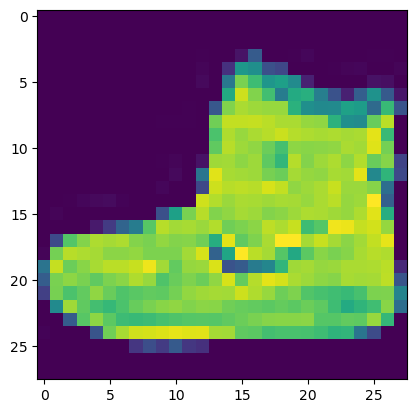

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train_full[0])

In [5]:
y_train_full[0]

9

In [6]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [7]:
class_names[y_train_full[10]]

'T-shirt/Top'

In [8]:
x_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

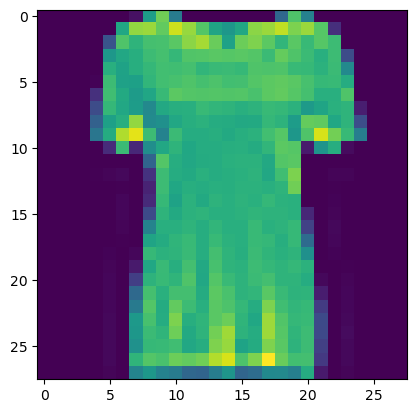

In [9]:
plt.imshow(x_train_full[10])

Normalization and Train-Test Split

In [10]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.

In [11]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n;

In [12]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

Model Structuring and Compilation

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape =(28, 28)))
model.add(keras.layers.Dense(500, activation = "relu"))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

2024-03-11 20:42:48.127579: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

Training the model

In [16]:
model_history = model.fit(x_train, y_train, epochs = 400, validation_data = (x_valid, y_valid))

Epoch 1/400
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6917 - accuracy: 0.7650 - val_loss: 0.5204 - val_accuracy: 0.8212
Epoch 2/400
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4664 - accuracy: 0.8348 - val_loss: 0.4116 - val_accuracy: 0.8542
Epoch 3/400
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4176 - accuracy: 0.8514 - val_loss: 0.5321 - val_accuracy: 0.8022
Epoch 4/400
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3893 - accuracy: 0.8629 - val_loss: 0.3678 - val_accuracy: 0.8744
Epoch 5/400
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3694 - accuracy: 0.8697 - val_loss: 0.3535 - val_accuracy: 0.8732
Epoch 6/400
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3487 - accuracy: 0.8741 - val_loss: 0.3485 - val_accuracy: 0.8778
Epoch 7/400
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8787 - val_loss: 0.3426 - val_ac

In [17]:
model_history.params

{'verbose': 1, 'epochs': 400, 'steps': 1719}

In [18]:
model_history.history

{'loss': [0.691652774810791,
  0.46635767817497253,
  0.41756659746170044,
  0.38933661580085754,
  0.3693634271621704,
  0.34870031476020813,
  0.33499428629875183,
  0.322535902261734,
  0.3104923367500305,
  0.30134493112564087,
  0.2920820713043213,
  0.28252777457237244,
  0.2746305465698242,
  0.2679426372051239,
  0.2586372196674347,
  0.25328704714775085,
  0.24703127145767212,
  0.24018988013267517,
  0.23399388790130615,
  0.22806331515312195,
  0.2220732718706131,
  0.2162262499332428,
  0.2117006629705429,
  0.2063779979944229,
  0.2011599838733673,
  0.1962578296661377,
  0.19190920889377594,
  0.18753822147846222,
  0.18192414939403534,
  0.17837755382061005,
  0.17332307994365692,
  0.16928908228874207,
  0.16504909098148346,
  0.162197083234787,
  0.15621532499790192,
  0.15373964607715607,
  0.14919984340667725,
  0.14387884736061096,
  0.14301808178424835,
  0.1381344199180603,
  0.13592135906219482,
  0.13246279954910278,
  0.12738196551799774,
  0.12455860525369644,

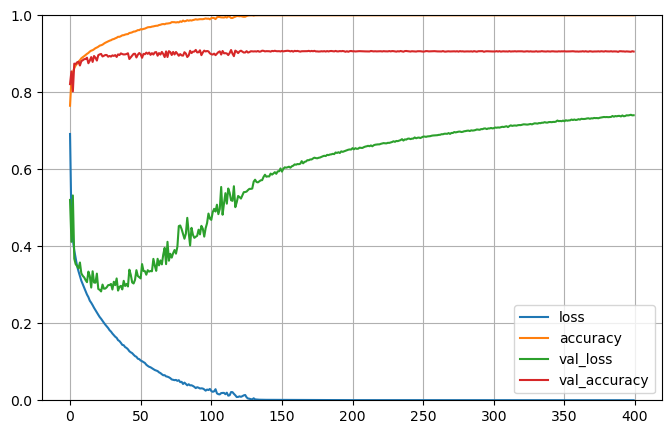

In [19]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Evaluating Performance

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8611 - accuracy: 0.8968


[0.8610953092575073, 0.8967999815940857]

In [21]:
x_new = x_test[:3]

In [22]:
y_pred = model.predict(x_new)
y_pred.round(2)

1/1 [==============================] - 0s 96ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
threshold = 0.5
y_pred_bool = (y_pred > threshold).astype(bool)
y_pred_bool

array([[False, False, False, False, False, False, False, False, False,
         True],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False]])

AxesImage(shape=(28, 28))


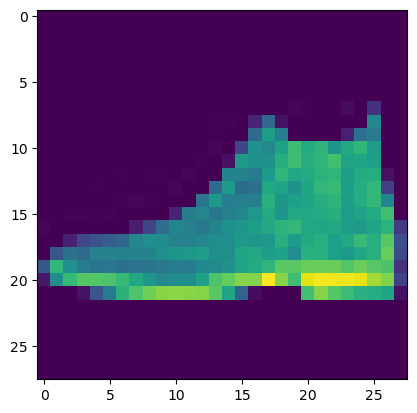

In [24]:
print(plt.imshow(x_test[0]))

AxesImage(shape=(28, 28))


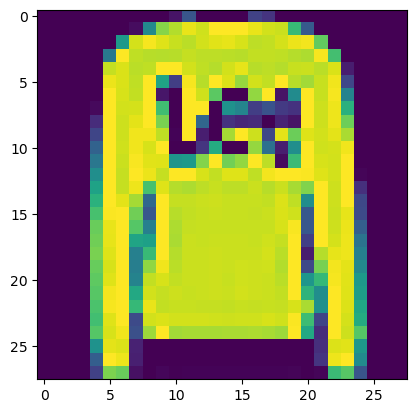

In [25]:
print(plt.imshow(x_test[1]))

AxesImage(shape=(28, 28))


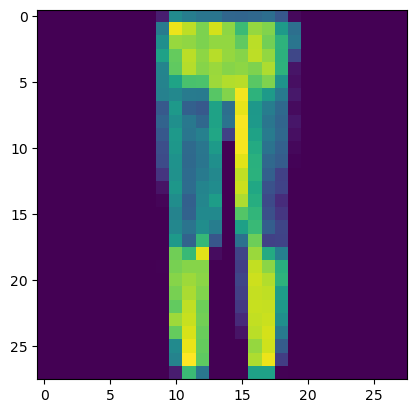

In [26]:
print(plt.imshow(x_test[3]))

In [27]:
keras.backend.clear_session()
del model

Model_2

Loading data

In [28]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

Data Reshape

In [29]:
x_train_full = x_train_full.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

Data Nomalize and Train Test Split

In [30]:
x_train_n = x_train_full/255.
x_test_n = x_test/255.

In [31]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n;

In [32]:
np.random.seed(42)
tf.random.set_seed(42)

Model Structuring and Compilation

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = "valid", activation = "relu",
                              input_shape =(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = "valid", activation = "relu",
                              input_shape =(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = 1, padding = "valid", activation = "relu",
                              input_shape =(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500, activation = "relu"))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [35]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Image_Classifier_Model.h5", save_best_only = True)
early_stoping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [36]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

Training the model

In [37]:
model_history = model.fit(x_train, y_train, epochs = 200,  validation_data = (x_valid, y_valid),
                          callbacks = [checkpoint_cb, early_stoping_cb])

Epoch 1/200
1719/1719 [==============================] - 20s 12ms/step - loss: 1.3624 - accuracy: 0.5011 - val_loss: 1.1161 - val_accuracy: 0.5782
Epoch 2/200
1719/1719 [==============================] - 20s 12ms/step - loss: 0.7300 - accuracy: 0.7267 - val_loss: 0.6442 - val_accuracy: 0.7638
Epoch 3/200
1719/1719 [==============================] - 20s 12ms/step - loss: 0.6141 - accuracy: 0.7717 - val_loss: 0.6049 - val_accuracy: 0.7612
Epoch 4/200
1719/1719 [==============================] - 20s 12ms/step - loss: 0.5506 - accuracy: 0.7956 - val_loss: 0.5101 - val_accuracy: 0.8222
Epoch 5/200
1719/1719 [==============================] - 20s 12ms/step - loss: 0.5085 - accuracy: 0.8122 - val_loss: 0.5029 - val_accuracy: 0.8162
Epoch 6/200
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4750 - accuracy: 0.8260 - val_loss: 0.4408 - val_accuracy: 0.8458
Epoch 7/200
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4488 - accuracy: 0.8365 - val_loss: 0

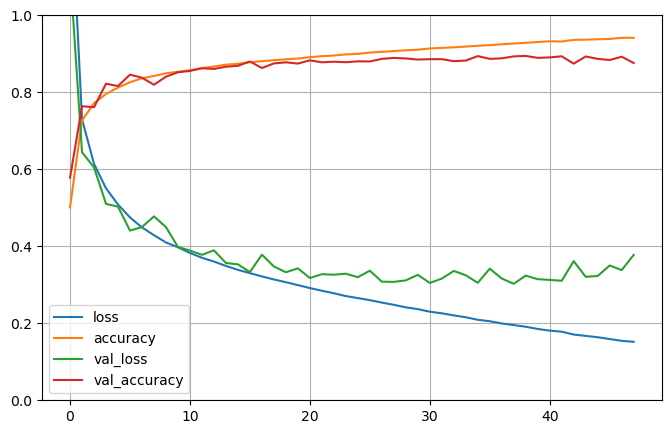

In [38]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluating Performance

In [39]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3264 - accuracy: 0.8901


[0.3263630270957947, 0.8901000022888184]

In [40]:
x_new = x_test[:3]

In [41]:
y_pred = model.predict(x_new)
y_pred.round(2)

1/1 [==============================] - 0s 123ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.96, 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [42]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(shape=(28, 28))


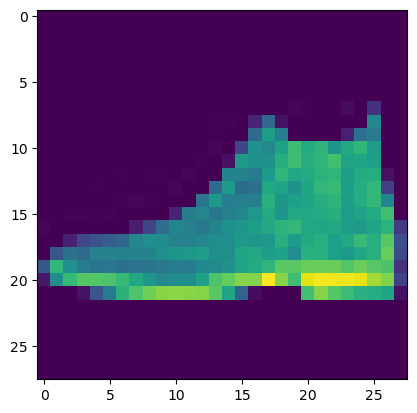

In [43]:
print(plt.imshow(x_test[0].reshape((28, 28))))

In [44]:
keras.backend.clear_session
del model

In [45]:
model = keras.models.load_model("Image_Classifier_Model.h5")

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3264 - accuracy: 0.8901


[0.3263630270957947, 0.8901000022888184]